In [129]:
# design model (input size, output size, forward pass)
# construct loss and optimizer
# training loop
#    - forward pass: compute prediction andloss
#    - backward pass: gradients
#    - update weights

In [130]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import trange

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [131]:
# prepare data

bc = datasets.load_breast_cancer() # binary classification
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print("n_samples, n_features", n_samples, n_features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print("shapes", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

n_samples, n_features 569 30
shapes (455, 30) (114, 30) (455,) (114,)


In [132]:
# scale data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [133]:
# convert from numpy doubles to numpy floats to torch tensors

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

print("y_train before reshape:", y_train.shape)
y_train = y_train.view(y_train.shape[0], 1)
print("y_train after reshape:", y_train.shape)
print()
print("y_test before reshape:", y_test.shape)
y_test = y_test.view(y_test.shape[0], 1)
print("y_test after reshape:", y_test.shape)

y_train before reshape: torch.Size([455])
y_train after reshape: torch.Size([455, 1])

y_test before reshape: torch.Size([114])
y_test after reshape: torch.Size([114, 1])


In [134]:
# setup model

# linear combination of weights and bias
# f = wx + b, sigmoid at the end

class LogisticRegression(nn.Module):
    
    def __init__(self, input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

In [135]:
# setup loss and optimizer

learning_rate = 0.01

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss: 0.06152:  59%|███████████████████████████████▋                      | 2934/5000 [00:02<00:01, 1210.26it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

loss: 0.05174: 100%|██████████████████████████████████████████████████████| 5000/5000 [00:03<00:00, 1255.61it/s]


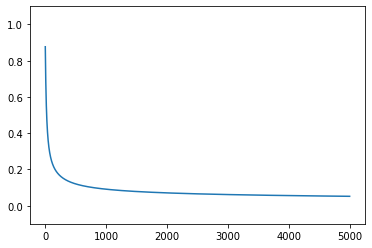

In [136]:
# training loop

n_iter = 5000

losses = []
accuracies = []

for epoch in (t := trange(n_iter)):
    y_predicted = model(X_train)
    
    loss = criterion(y_predicted, y_train)
    
    loss = loss.mean()
    loss.backward()
    
    optimizer.step()
    
    optimizer.zero_grad()
    
    losses.append(loss.item())
    
    t.set_description("loss: %.5f" % (loss.item()))
    
plt.ylim(-0.1, 1.1)
plt.plot(losses)

In [137]:
# eval

with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_classes = y_predicted.round()
    accuracy = y_predicted_classes.eq(y_test).sum() / float(y_test.shape[0])
    print(accuracy)

tensor(0.9649)
